### PCA : 3D -> 2D 

In [27]:
# 임의의 3D 데이터 생성
# 타원형이고 / 3D 공간에서 회전 / 점들이 고르지 않게 분포 / 노이즈가 많은 데이터

In [28]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))   # 3차원 행렬을 정의
np.random.seed(42)

angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi          # 고르지 않은 분포
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5    # 두 축에 임의의 값들을 배치

X += 0.28 * np.random.randn(m, 3)   # 노이즈 추가, X[:, 2] 열에 임의 값(0아닌) 입력됨
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]   # 약간의 평행이동
X

array([[-0.47562927, -1.18002627, -0.18665138],
       [-0.32908278,  0.18101846, -0.32767249],
       [ 1.1241412 ,  0.33792292,  0.15481443],
       [ 0.28072425, -0.21472162,  0.43963185],
       [-0.59903727, -0.94120105,  0.06412454],
       [-0.19688428, -0.59920621,  0.01191996],
       [-0.49635908, -1.18078845,  0.17385141],
       [ 0.57308241,  0.89868775,  0.66600244],
       [ 0.59410487, -0.55817151,  0.2549555 ],
       [ 1.17064931,  0.37224377,  0.80362823],
       [-1.1730746 , -1.04622548, -0.08061077],
       [-0.60011541, -0.3620432 , -0.50511579],
       [ 0.4963413 ,  0.74149446,  0.76848193],
       [-0.39977922, -0.95243354, -0.15466053],
       [-0.35448133, -0.44161974, -0.07728984],
       [-0.42846627, -0.63087978,  0.31216388],
       [-0.48357266, -0.92949165, -0.12834249],
       [-0.30000318, -0.94201494,  0.07449738],
       [-0.14919128, -0.76135868, -0.35919894],
       [-0.42432217, -0.85484973, -0.22736351],
       [ 0.29610766, -0.47325168,  0.672

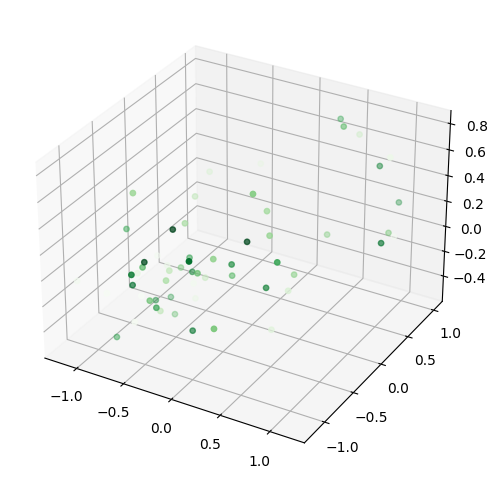

In [29]:
import matplotlib.pyplot as plt

n = len(X)
cmin, cmax = 0, 2
color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])
# 데이터 갯수에 맞게 마커 색상 그라데이션 처리

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, marker='o', s=15, cmap='Greens')

# 특정 방향으로 회전하여 보고자 할 경우,
# ax.view_init(90, -90)

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)    # 3D -> 2D 변환

In [31]:
# axis = 0 : 행방향 , axis =1 : 열방향

print(X.mean(axis=0))
# 각 열의 평균값을 계산하여 출력

[-0.10328253 -0.37998889  0.08555963]


In [32]:
# 참고:
print(X.mean(axis=1))

[-0.61410231 -0.15857894  0.53895952  0.16854483 -0.49203793 -0.26139018
 -0.5010987   0.71259087  0.09696295  0.78217377 -0.76663695 -0.48909147
  0.66877257 -0.5022911  -0.2911303  -0.24906072 -0.51380227 -0.38917358
 -0.42324963 -0.50217847  0.16508734 -0.36929499 -0.66239716  0.01396685
 -0.23389159  0.70492323 -0.14851641  0.06558758 -0.10052632 -0.35137264
 -0.1396903  -0.51895883 -0.46262013 -0.10122445 -0.43808553  0.71765925
 -0.46242764 -0.4579485   0.11379983 -0.25669812 -0.19231148 -0.0224576
 -0.52859402  0.23914585 -0.39996354  0.60392623 -0.55296187 -0.10169802
 -0.3009752  -0.34867515 -0.34247292  0.58919426  0.01509939  0.33476194
  0.12204884  0.6727986  -0.27019863 -0.29714364 -0.30444005 -0.7608724 ]


In [33]:
# PCA

X2D = pca.fit_transform(X)   # 2D로 축소된 데이터셋
# 특징행렬을 낮은 차원의 근사행렬로 변환

X2D
# 변환된 2차원 행렬을 출력

array([[-8.73231190e-01,  2.94598030e-01],
       [ 1.48885182e-01, -5.14935573e-01],
       [ 1.35121872e+00,  3.99501548e-01],
       [ 4.54366763e-01,  1.39984497e-01],
       [-7.34389086e-01,  2.28934648e-02],
       [-2.33347464e-01,  8.67844755e-02],
       [-8.08435321e-01,  2.52457557e-01],
       [ 1.48281454e+00, -4.22796305e-01],
       [ 3.85679006e-01,  6.16229365e-01],
       [ 1.54972180e+00,  3.60381563e-01],
       [-1.22938760e+00, -3.12504780e-01],
       [-4.54653275e-01, -3.28839370e-01],
       [ 1.34315899e+00, -3.79446240e-01],
       [-6.55233341e-01,  1.92367174e-01],
       [-2.49510114e-01, -1.28486810e-01],
       [-3.46562831e-01, -8.32312189e-02],
       [-6.90221113e-01,  1.13712645e-01],
       [-5.29757591e-01,  2.40403321e-01],
       [-3.96344855e-01,  2.60334107e-01],
       [-6.19519220e-01,  1.13588889e-01],
       [ 3.34910399e-01,  3.09476565e-01],
       [-4.52441114e-01, -1.28501562e-01],
       [-1.02718730e+00,  7.20555799e-03],
       [ 2.

In [34]:
# 변환된 2차원 값을 
# 3차원 주성분 평면 위에 표시하고자 할 때,

X3D_inv = pca.inverse_transform(X2D)

X3D_inv

array([[-0.48131774, -1.19254767, -0.12928528],
       [-0.37721497,  0.07507037,  0.15772285],
       [ 1.10452825,  0.29475108,  0.3526038 ],
       [ 0.30697276, -0.15694366,  0.17492535],
       [-0.58495084, -0.91019416, -0.07793182],
       [-0.19843236, -0.60261383,  0.02753176],
       [-0.46803439, -1.11844043, -0.11179257],
       [ 0.59505066,  0.94704405,  0.44446073],
       [ 0.6071517 , -0.52945297,  0.12338308],
       [ 1.21074153,  0.46049435,  0.39931307],
       [-1.16507294, -1.02861231, -0.16130454],
       [-0.65125133, -0.47460306,  0.010571  ],
       [ 0.53185013,  0.81965614,  0.41038853],
       [-0.40783143, -0.97015799, -0.07345693],
       [-0.36615474, -0.46731513,  0.04043216],
       [-0.39905846, -0.56614762,  0.01559706],
       [-0.48884742, -0.94110239, -0.07514853],
       [-0.28770798, -0.91495086, -0.04949523],
       [-0.18266425, -0.83503902, -0.02163652],
       [-0.44096094, -0.8914748 , -0.05956776],
       [ 0.34933215, -0.35609447,  0.135

#### 투영 평면 생성

In [35]:
X_centered = X - X.mean(axis=0)      # 각 점과 평균점 사이의 거리
U, s, Vt = np.linalg.svd(X_centered)

# U : 직교행렬, m x m 행렬로 속한 벡터는 특이벡터(singular vector)로 서로 직교한다.
# s : m x n 행렬로 대각원소(행렬 A의 특이값)만 0이 아니고 나머지는 0이다.
# Vt : n x n 행렬로 속한 벡터는 특이벡터(sigular vector)로 서로 직교한다.

In [36]:
# X, Y, Z의 표시 범위를 미리 정의
axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]    # mesh grid를 그리기 위한 범위 설정
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1] , 10), np.linspace(axes[2], axes[3], 10))
# 2D 평면의 범위를 지정

In [37]:
# Vt : 행렬 연산을 통해 구한 특이벡터의 값

w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # 투영 평면식의 계수
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]

# 평면 방정식을 함수로 표현하여 z를 앞으로 이동
# 평면으로 표시될 점들의 집합을 계산 완료 : [x1, x2, z]

#### 참고 : 평면식 이론

In [38]:
# 평면을 나타내는 식의 정의
# n1(x - a) + n2(y - b) + n3(z - c) = 0 

# 여기서 a, b, c는 평면 위의 한 점이고, (n1, n2, n3)는 평면의 법선 벡터이다.

In [39]:
# 법선 벡터를 구하는 법
# 평면 위에 있는 두 점(x1, y1, z1), (x2, y2, z2)가 주어졌을 때,
# 두 점을 연결하는 벡터 (x1-x1, y1-y2, z1-z2)와 다른 한 점(x3, y3, z3)가 주어졌을 때,
# (X3-x1, y3-y1, z3-z1)의 외적을 계산하여 법선 벡터를 구할 수 있다.

# 평면 위의 임의의 세점
p1 = np.array([1, 3, 2])
p2 = np.array([2, 4, 5])
p3 = np.array([-4, -2, -6])

# 두 벡터의 계산
v1 = p2 - p1
v2 = p3 - p1

# 법선 벡터의 계산
normal_vector = np.cross(v1, v2)

# 평면 방정식 
n1, n2, n3 = normal_vector
a, b, c = p1

print(f"평면 방정식: {n1}(x-{a}) + {n2}(y-{b}) + {n3}(z-{c}) = 0")

평면 방정식: 7(x-1) + -7(y-3) + 0(z-2) = 0


In [43]:
## 다시 코드 진행...
# 위에 정의해 놓은 평면식은 그래프로 표현할 때 사용

# 평면의 위/아래를 구분하고
# 원래 점과 투영된 점을 시각적으로 확인하기 위하여 점선으로 연결
# 각 점에 라벨 표시를 위한 코드 작성 - 2D PCA 코드와 동일

# PCA 평면 기준으로 위아래 점들을 나누어 놓고
# 그래픽에 색깔만 다르게 표시하여 plot하기 위하여 저장함 : 데이터 순서 정보가 엉망이되므로
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]    # 3D z좌표 기준으로 위쪽 점들 
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]    # 3D z좌표 기준으로 아래쪽 점들



In [56]:
test = np.array([[1, 2, 3], [4, 5, 6], [7, 8,9]])
test[1][1]


5

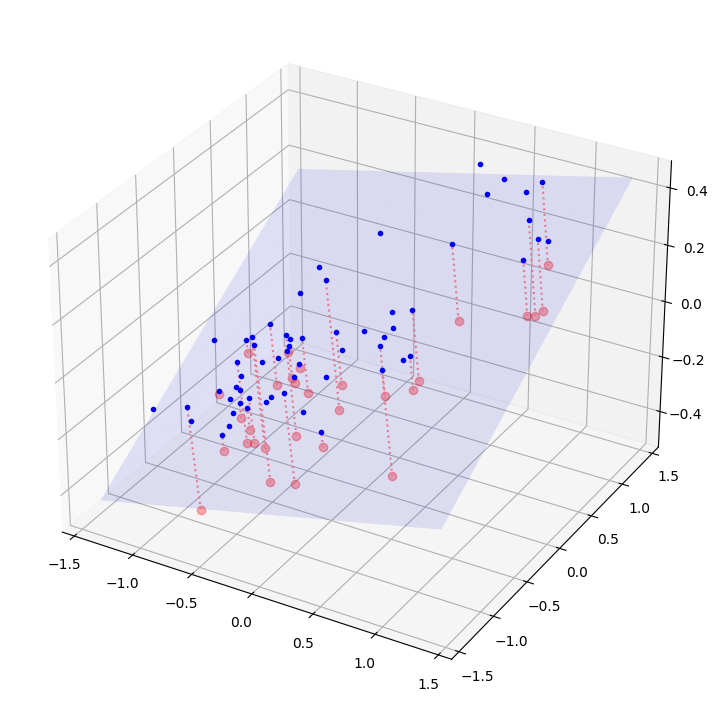

In [57]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# 평면 아래의 샘플 플롯
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)

# 평면 아래 점의과 평면 사이 투영선(점선) 그리기
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:     # Z축 값이 평면위 투영점 보다 작은 경우 = 평면 아래쪽 점의 경우,
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")      # numpy array의 특정 점 지정하는 방법 x[i][j]
        
# 평면 그리기 : plot_surface
ax.plot_surface(x1, x2, z, alpha=0.1, color='b')

# 평면 위 점 그리기
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

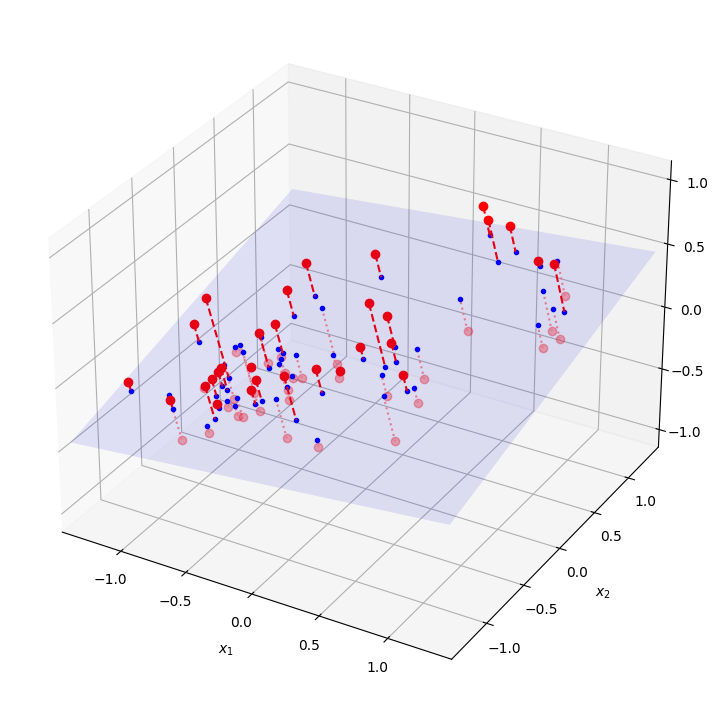

In [58]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# 평면 아래의 샘플 플롯
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)   # 평면 아래쪽이라 투명하게 처리

# 평면 아래 점의과 평면 사이 투영선(점선) 그리기
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:     # Z축 값이 평면위 투영점 보다 작은 경우 = 평면 아래쪽 점의 경우,
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")      # numpy array의 특정 점 지정하는 방법 x[i][j]
        
# 평면 그리기 : plot_surface
ax.plot_surface(x1, x2, z, alpha=0.1, color='b')

# 평면 위 점 그리기
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

#--------------------------------------------------------------
# 평면 위의 샘플 플롯
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")  # 평면 위쪽 점들 : 투명 처리 삭제

# 평면 위의 점과 평면 사이 투영선(점선) 그리기
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:     # Z축 값이 평면위 투영점 보다 작은 경우 = 평면 아래쪽 점의 경우,
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")      # numpy array의 특정 점 지정하는 방법 x[i][j]

#--------------------------------------------------------------
# 그래프 꾸미기

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
        
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)

    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

plt.show()

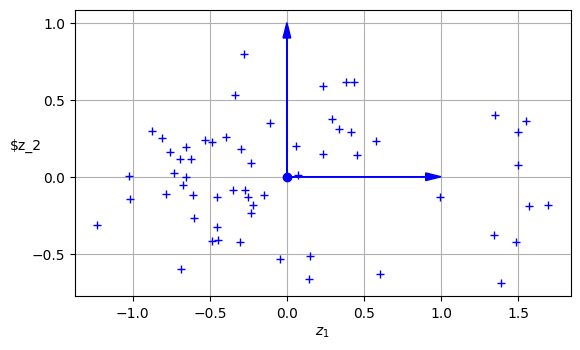

In [59]:
# 투영된 평면만 나타낸다면

fig = plt.figure()
ax = fig.add_subplot(1,1,1, aspect='equal')

ax.plot(X2D[:,0], X2D[:,1], 'b+')   # 변환된 X2D를 plot 
ax.plot([0], [0], "bo")             # 원점 표시

# 좌표축 : 벡터(화살표)로 표시
# plt.arrow(x, y, dx, dy, ----> 출발점, 길이 정의)

ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='b', ec='b', linewidth=1)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='b', ec='b', linewidth=1)

ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])

ax.set_ylabel("$z_2", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)

